# Método de Runge-Kutta-Fehlberg

Estuardo Díaz, 16110

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

Este método nos permite aproximar una solución para $t\in [a,b]$ para la ecuación 
$$ f(x,t) = \frac{\partial x}{\partial t}$$

El método recibe la funcion $f$, los límites del intervalo $a$ y $b$, una condición inicial $x_0$, una tolerancia de error de truncamiento, y cotas del tamaño del paso.

Devuelve los valores de $t$ (variable independiente) y $x$ (variable dependiente) que son solución de la ecuación diferencial.

Para garantizar el funcionamiento del método, se pide que $f$ sea continua y cumpla con la condición de Lipschits, i.e. 
$|f(x_1)-f(x_2)| \leq B|x_1-x_2|^\beta$, $\beta > 0$, $\forall |x_1-x_2| < \epsilon$.

## Método:
Primero calculamos las constantes
\begin{align}
k_1 &= h f\Big(t_j,\,\,x_j\Big)\\
k_2 &= h f\Big(t_j + \frac{1}{4}h,\,\,  x_j+\frac{1}{4}k_1\Big)\\
k_3 &= h f\Big(t_j + \frac{3}{8}h,\,\,  x_j+\frac{3}{32}k_1+\frac{9}{32}k_2\Big)\\
k_4 &= h f\Big(t_j + \frac{12}{13}h,\,\,  x_j+\frac{1932}{2197}k_1 - \frac{7200}{2197}k_2 + \frac{7296}{2197}k_3\Big)\\
k_5 &= h f\Big(t_j + h,\,\,  x_j+\frac{439}{216}k_1 -8k_2 +\frac{3680}{513}k_3 -\frac{845}{4104}k_4\Big)\\
k_6 &= h f\Big(t_j + \frac{1}{2}h,\,\,  x_j -\frac{8}{27}k_1+2k_2-\frac{3544}{2565}k_3+\frac{1859}{4104}k_4-\frac{11}{40}k_5\Big)\\
\end{align}

Y luego podemos calcular el siguiente valor de $x$:
$$x_{j+1} = x_j + \frac{25}{216}k_1 +\frac{1408}{2565}k_3 +\frac{2197}{4104}k_4 - \frac{1}{5}k_5$$

In [3]:
def rkf( f, a, b, x0, tol = 0.01, hmax=0.2, hmin=0.05 ):
    # Coeficients usados para calcular la variable independiente de f
    a2  =   2.500000000000000e-01  #  1/4
    a3  =   3.750000000000000e-01  #  3/8
    a4  =   9.230769230769231e-01  #  12/13
    a5  =   1.000000000000000e+00  #  1
    a6  =   5.000000000000000e-01  #  1/2

    # Coeficients usados para calcular la variable dependiente de f
    b21 =   2.500000000000000e-01  #  1/4
    b31 =   9.375000000000000e-02  #  3/32
    b32 =   2.812500000000000e-01  #  9/32
    b41 =   8.793809740555303e-01  #  1932/2197
    b42 =  -3.277196176604461e+00  # -7200/2197
    b43 =   3.320892125625853e+00  #  7296/2197
    b51 =   2.032407407407407e+00  #  439/216
    b52 =  -8.000000000000000e+00  # -8
    b53 =   7.173489278752436e+00  #  3680/513
    b54 =  -2.058966861598441e-01  # -845/4104
    b61 =  -2.962962962962963e-01  # -8/27
    b62 =   2.000000000000000e+00  #  2
    b63 =  -1.381676413255361e+00  # -3544/2565
    b64 =   4.529727095516569e-01  #  1859/4104
    b65 =  -2.750000000000000e-01  # -11/40

    # Coeficients para calcular la aproximacion del error de truncamiento local

    r1  =   2.777777777777778e-03  #  1/360
    r3  =  -2.994152046783626e-02  # -128/4275
    r4  =  -2.919989367357789e-02  # -2197/75240
    r5  =   2.000000000000000e-02  #  1/50
    r6  =   3.636363636363636e-02  #  2/55

    # Coeficients para calcular la aproximacion de 4to orden de 
    # Runge-Kutta

    c1  =   1.157407407407407e-01  #  25/216
    c3  =   5.489278752436647e-01  #  1408/2565
    c4  =   5.353313840155945e-01  #  2197/4104
    c5  =  -2.000000000000000e-01  # -1/5

    # Condiciones iniciales
  
    t = a
    x = x0
    h = hmax

    # Arrays con futuros resultados

    T = np.array( [t] )
    X = np.array( [x] )

    while t < b:

        # Ajustamos el tamaño del paso si llegamos al ultimo intervalo

        if t + h > b:
            h = b - t;

        # Calculamos los valores necesarios para el algoritmo de 
        # Runge-Kutta de orden 4

        k1 = h * f( x, t )
        k2 = h * f( x + b21 * k1, t + a2 * h )
        k3 = h * f( x + b31 * k1 + b32 * k2, t + a3 * h )
        k4 = h * f( x + b41 * k1 + b42 * k2 + b43 * k3, t + a4 * h )
        k5 = h * f( x + b51 * k1 + b52 * k2 + b53 * k3 + b54 * k4, t + a5 * h )
        k6 = h * f( x + b61 * k1 + b62 * k2 + b63 * k3 + b64 * k4 + b65 * k5, \
                    t + a6 * h )

        # Calculamos el estimado del error local de truncamiento.
        # Si es suficientemente pequeño guardamos el estimado de 4to orden
    
        r = abs( r1 * k1 + r3 * k3 + r4 * k4 + r5 * k5 + r6 * k6 ) / h
        if len( np.shape( r ) ) > 0:
            r = max( r )
        if r <= tol:
            t = t + h
            x = x + c1 * k1 + c3 * k3 + c4 * k4 + c5 * k5
            T = np.append( T, t )
            X = np.append( X, [x], 0 )

        # Calculamos el siguiente paso
        h = h * min( max( 0.84 * ( tol / r )**0.25, 0.1 ), 4.0 )

        if h > hmax:
            h = hmax
        elif h < hmin:
            break
    return ( T, X )

## Problema:
Consideremos la ecuación diferencial $$\frac{\partial x}{\partial t} = 1- tx$$ La solución exacta es $$x(t) = ce^{-t^2/2} + \sqrt{\frac{\pi}{2}}e^{-t^2/2} erfi\big(\frac{t}{\sqrt{2}}\big)$$

In [4]:
def f(x,t):
    return 1-x*t

In [5]:
def sol(t,c=0):
    return np.exp(-(t**2)/2)*(c+np.sqrt(np.pi/2)*special.erfi(t/np.sqrt(2)))

Comparamos entonces la solución obtenida con este método y la solución obtenida analíticamente

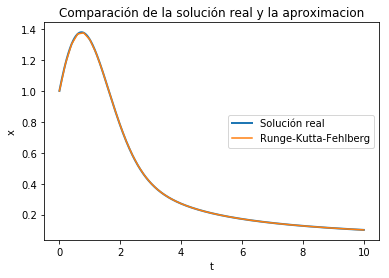

In [6]:
# Valores iniciales/de frontera
x0 = 1
a = 0
b = 10

# Solucion real
t1 = np.linspace(a,b,1000)
y = sol(t1,x0)

# Aproximacion por el metodo Runge-Kutta-Fehlberg
t, x = rkf( f, a, b, x0)

# Graficar
fig, ax = plt.subplots()
ax.plot(t1, y, label='Solución real',linewidth=2)
ax.plot(t, x, label='Runge-Kutta-Fehlberg')
legend = ax.legend(loc='center right')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Comparación de la solución real y la aproximacion')
plt.show()

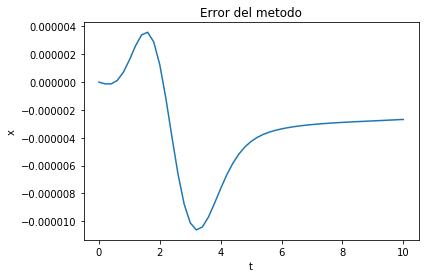

In [7]:
y = sol(t,x0)
plt.plot(t,x-y)
plt.ylabel('x')
plt.xlabel('t')
plt.title('Error del metodo')
plt.show()

Como podemos observar, el error es bastante pequeño.

In [8]:
t

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
        2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
        4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
        6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
        8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10. ])